In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime

def get_stock_data(ticker, start_date, end_date):
    # 获取股票数据
    return yf.download(ticker, start=start_date, end=end_date)

def calculate_return_rate(stock_data, days):
    # 计算股票收益率
    return stock_data['Adj Close'].pct_change(days)

def calculate_volatility(stock_data, days):
    # 计算股票波动率
    return stock_data['Adj Close'].pct_change().rolling(window=days).std()

def perform_regression(stock_returns, index_returns):
    # 执行回归分析
    X = sm.add_constant(index_returns)  
    model = sm.OLS(stock_returns, X).fit()
    return model.params

start_date = '1994-01-01'
end_date = '2020-12-31'

# 获取恒生指数数据
hsi_data = get_stock_data('^HSI', start_date, end_date)

# 计算不同时间段的收益率
three_month_return = calculate_return_rate(hsi_data, 90)
six_month_return = calculate_return_rate(hsi_data, 180)
twelve_month_return = calculate_return_rate(hsi_data, 365)

# 计算不同时间段的波动率
volatility_20 = calculate_volatility(hsi_data, 20)
volatility_60 = calculate_volatility(hsi_data, 60)
volatility_120 = calculate_volatility(hsi_data, 120)
volatility_240 = calculate_volatility(hsi_data, 240)

# 月度恒生指数收益率
monthly_hsi_returns = hsi_data['Adj Close'].resample('M').ffill().pct_change()

# 打印结果
print("Three Month Return:", three_month_return[-1])
print("Six Month Return:", six_month_return[-1])
print("Twelve Month Return:", twelve_month_return[-1])
print("20-Day Volatility:", volatility_20[-1])
print("60-Day Volatility:", volatility_60[-1])
print("120-Day Volatility:", volatility_120[-1])
print("240-Day Volatility:", volatility_240[-1])


[*********************100%%**********************]  1 of 1 completed

Three Month Return: 0.07816856275891859
Six Month Return: 0.11931661330728027
Twelve Month Return: -0.04652035274436184
20-Day Volatility: 0.008478665173424507
60-Day Volatility: 0.009773583213867754
120-Day Volatility: 0.010400369585743488
240-Day Volatility: 0.014860040960798166


In [27]:
import yfinance as yf
import pandas as pd
import numpy as np

def fetch_financial_data(ticker):
    # 获取股票信息、财务数据和资产负债表数据
    stock = yf.Ticker(ticker)
    stock_info = stock.info
    financials = stock.financials.T if stock.financials is not None else pd.DataFrame()
    balance_sheet = stock.balance_sheet.T if stock.balance_sheet is not None else pd.DataFrame()
    return stock_info, financials, balance_sheet

def calculate_ratios(ticker):
    # 计算各种财务比率
    stock_info, financials, balance_sheet = fetch_financial_data(ticker)

    price = stock_info.get('currentPrice', pd.NA)
    earnings = financials.get('Net Income').iloc[0] if 'Net Income' in financials else pd.NA
    sales = financials.get('Total Revenue').iloc[0] if 'Total Revenue' in financials else pd.NA
    book_value = balance_sheet.get('Total Stockholder Equity').iloc[0] if 'Total Stockholder Equity' in balance_sheet else pd.NA
    shares_outstanding = stock_info.get('sharesOutstanding', pd.NA)

    pe_ratio = price / (earnings / shares_outstanding) if pd.notna([price, earnings, shares_outstanding]).all() else pd.NA
    ps_ratio = price / (sales / shares_outstanding) if pd.notna([price, sales, shares_outstanding]).all() else pd.NA
    pb_ratio = price / (book_value / shares_outstanding) if pd.notna([price, book_value, shares_outstanding]).all() else pd.NA

    market_cap = price * shares_outstanding if pd.notna([price, shares_outstanding]).all() else pd.NA
    log_market_cap = np.log(market_cap) if pd.notna(market_cap) else pd.NA

    return {
        'PE Ratio': pe_ratio,
        'PS Ratio': ps_ratio,
        'PB Ratio': pb_ratio,
        'Market Cap': market_cap,
        'Log Market Cap': log_market_cap,
    }

ticker = 'AAPL'
ratios = calculate_ratios(ticker)
print(ratios)


{'PE Ratio': 30.5364360963893, 'PS Ratio': 7.727622054526735, 'PB Ratio': <NA>, 'Market Cap': 2961881619169.2803, 'Log Market Cap': 28.716845864455987}


In [28]:
import pandas as pd

def calculate_financial_ratios(financial_data):
    # 获取财务数据
    total_profit = financial_data.get('total_profit')
    operating_income = financial_data.get('operating_income')
    total_assets = financial_data.get('total_assets')
    net_interest = financial_data.get('net_interest')
    accounts_receivable = financial_data.get('accounts_receivable')
    current_assets = financial_data.get('current_assets')
    fixed_assets = financial_data.get('fixed_assets')
    total_liabilities = financial_data.get('total_liabilities')
    intangible_assets = financial_data.get('intangible_assets', 0)  

    last_year_data = financial_data.get('last_year_data')
    # 计算财务比率
    total_profit_to_operating_income = total_profit / operating_income if operating_income else pd.NA
    annualized_total_asset_net_interest_rate = (net_interest / total_assets) * 12 if total_assets else pd.NA
    total_operating_income_growth_rate = ((operating_income - last_year_data['operating_income']) / last_year_data['operating_income']) if last_year_data.get('operating_income') else pd.NA
    operating_income_growth_rate = ((operating_income - last_year_data['operating_income']) / last_year_data['operating_income']) if last_year_data.get('operating_income') else pd.NA
    total_profit_growth_rate = ((total_profit - last_year_data['total_profit']) / last_year_data['total_profit']) if last_year_data.get('total_profit') else pd.NA
    operating_profit_growth_rate = ((total_profit - last_year_data['total_profit']) / last_year_data['total_profit']) if last_year_data.get('total_profit') else pd.NA
    accounts_receivable_turnover_rate = operating_income / accounts_receivable if accounts_receivable else pd.NA
    current_asset_turnover_rate = operating_income / current_assets if current_assets else pd.NA
    fixed_asset_turnover_rate = operating_income / fixed_assets if fixed_assets else pd.NA
    total_asset_turnover_rate = operating_income / total_assets if total_assets else pd.NA
    tangible_assets_to_total_liabilities = (total_assets - intangible_assets) / total_liabilities if total_liabilities else pd.NA

    return {
        'Total Profit to Operating Income': total_profit_to_operating_income,
        'Annualized Total Asset Net Interest Rate': annualized_total_asset_net_interest_rate,
        'Total Operating Income Growth Rate': total_operating_income_growth_rate,
        'Operating Income Growth Rate': operating_income_growth_rate,
        'Total Profit Growth Rate': total_profit_growth_rate,
        'Operating Profit Growth Rate': operating_profit_growth_rate,
        'Accounts Receivable Turnover Rate': accounts_receivable_turnover_rate,
        'Current Asset Turnover Rate': current_asset_turnover_rate,
        'Fixed Asset Turnover Rate': fixed_asset_turnover_rate,
        'Total Asset Turnover Rate': total_asset_turnover_rate,
        'Tangible Assets to Total Liabilities': tangible_assets_to_total_liabilities
    }


financial_data = {
    'total_profit': 103562.24923083857,
    'operating_income': 162004.32576757058,
    'total_assets': 459990.9786439449,
    'net_interest': 5046.825738526,
    'accounts_receivable': 29754.06915289381,
    'current_assets': 195328.88317592916,
    'fixed_assets': 235509.486950859,
    'total_liabilities': 360949.5995159048,
    'intangible_assets': 49523.211863070996, 
    'last_year_data': {
        'operating_income': 148439.1022851161,
        'total_profit': 82358.64822242287
    }
}

ratios = calculate_financial_ratios(financial_data)
print(ratios)



{'Total Profit to Operating Income': 0.6666666666666666, 'Annualized Total Asset Net Interest Rate': 0.12, 'Total Operating Income Growth Rate': 0.07142857142857142, 'Operating Income Growth Rate': 0.07142857142857142, 'Total Profit Growth Rate': 0.1111111111111111, 'Operating Profit Growth Rate': 0.1111111111111111, 'Accounts Receivable Turnover Rate': 5.0, 'Current Asset Turnover Rate': 0.75, 'Fixed Asset Turnover Rate': 0.6, 'Total Asset Turnover Rate': 0.3, 'Tangible Assets to Total Liabilities': 1.2857142857142858}


In [8]:
def calculate_financial_metrics(financial_data):

    net_income = financial_data.get('net_income')
    weighted_average_shares_outstanding = financial_data.get('weighted_average_shares_outstanding')
    weighted_average_diluted_shares_outstanding = financial_data.get('weighted_average_diluted_shares_outstanding')
    total_operating_income = financial_data.get('total_operating_income')
    total_operating_costs = financial_data.get('total_operating_costs')
    non_operating_income = financial_data.get('non_operating_income')
    non_operating_expenses = financial_data.get('non_operating_expenses')
    cash_received_from_sales = financial_data.get('cash_received_from_sales')
    cash_inflow_operating = financial_data.get('cash_inflow_operating')
    cash_outflow_operating = financial_data.get('cash_outflow_operating')
    cash_paid_for_goods = financial_data.get('cash_paid_for_goods')
    cash_paid_to_employees = financial_data.get('cash_paid_to_employees')
    cash_inflow_investing = financial_data.get('cash_inflow_investing')
    cash_outflow_investing = financial_data.get('cash_outflow_investing')
    cash_inflow_financing = financial_data.get('cash_inflow_financing')
    cash_outflow_financing = financial_data.get('cash_outflow_financing')

    basic_eps = net_income / weighted_average_shares_outstanding if weighted_average_shares_outstanding else 0
    diluted_eps = net_income / weighted_average_diluted_shares_outstanding if weighted_average_diluted_shares_outstanding else 0
    operating_profit = total_operating_income - total_operating_costs
    total_profit = operating_profit + non_operating_income - non_operating_expenses
    net_cash_flow_investing = cash_inflow_investing - cash_outflow_investing
    net_cash_flow_financing = cash_inflow_financing - cash_outflow_financing

    return {
        'Basic EPS': basic_eps,
        'Diluted EPS': diluted_eps,
        'Total Operating Income': total_operating_income,
        'Total Operating Costs': total_operating_costs,
        'Operating Profit': operating_profit,
        'Non-Operating Income': non_operating_income,
        'Non-Operating Expenses': non_operating_expenses,
        'Total Profit': total_profit,
        'Net Income': net_income,
        'Cash Received from Sales': cash_received_from_sales,
        'Cash Inflow from Operating': cash_inflow_operating,
        'Cash Outflow from Operating': cash_outflow_operating,
        'Cash Paid for Goods': cash_paid_for_goods,
        'Cash Paid to Employees': cash_paid_to_employees,
        'Cash Inflow from Investing': cash_inflow_investing,
        'Cash Outflow from Investing': cash_outflow_investing,
        'Net Cash Flow from Investing': net_cash_flow_investing,
        'Cash Inflow from Financing': cash_inflow_financing,
        'Cash Outflow from Financing': cash_outflow_financing,
        'Net Cash Flow from Financing': net_cash_flow_financing
    }


financial_data = {'net_income': 343962389.3325947,
 'weighted_average_shares_outstanding': 83087171.20982914,
 'weighted_average_diluted_shares_outstanding': 90228199.72392844,
 'total_operating_income': 504534797.11300004,
 'total_operating_costs': 790561805.8594426,
 'non_operating_income': 8212839.8347061975,
 'non_operating_expenses': 5278555.667424139,
 'cash_received_from_sales': 511228212.24122816,
 'cash_inflow_operating': 21386291.876976423,
 'cash_outflow_operating': 69295467.08848768,
 'cash_paid_for_goods': 63774564.133204184,
 'cash_paid_to_employees': 64250014.34631497,
 'cash_inflow_investing': 5528209.88556267,
 'cash_outflow_investing': 1687609.3705714855,
 'cash_inflow_financing': 1378128.5682761506,
 'cash_outflow_financing': 2029425.5519711017
}


financial_metrics = calculate_financial_metrics(financial_data)
print(financial_metrics)


{'Basic EPS': 4.139777348586688, 'Diluted EPS': 3.812138448788934, 'Total Operating Income': 504534797.11300004, 'Total Operating Costs': 790561805.8594426, 'Operating Profit': -286027008.74644256, 'Non-Operating Income': 8212839.8347061975, 'Non-Operating Expenses': 5278555.667424139, 'Total Profit': -283092724.5791605, 'Net Income': 343962389.3325947, 'Cash Received from Sales': 511228212.24122816, 'Cash Inflow from Operating': 21386291.876976423, 'Cash Outflow from Operating': 69295467.08848768, 'Cash Paid for Goods': 63774564.133204184, 'Cash Paid to Employees': 64250014.34631497, 'Cash Inflow from Investing': 5528209.88556267, 'Cash Outflow from Investing': 1687609.3705714855, 'Net Cash Flow from Investing': 3840600.5149911847, 'Cash Inflow from Financing': 1378128.5682761506, 'Cash Outflow from Financing': 2029425.5519711017, 'Net Cash Flow from Financing': -651296.983694951}


In [31]:
def calculate_financial_ratios(financial_data):
    total_assets = financial_data['total_current_assets'] + financial_data['total_non_current_assets']
    total_liabilities = financial_data['total_current_liabilities'] + financial_data['total_non_current_liabilities']

    current_ratio = financial_data['total_current_assets'] / financial_data['total_current_liabilities']
    quick_ratio = (financial_data['total_current_assets'] - financial_data['inventory']) / financial_data['total_current_liabilities']
    net_cash_flow_to_current_liabilities = financial_data['net_cash_flow_operating'] / financial_data['total_current_liabilities']
    equity_ratio = financial_data['total_equity'] / total_assets
    circulating_capital = financial_data['total_current_assets'] - financial_data['total_current_liabilities']

    return {
        'Current Ratio': current_ratio,
        'Quick Ratio': quick_ratio,
        'Net Cash Flow to Current Liabilities': net_cash_flow_to_current_liabilities,
        'Equity Ratio': equity_ratio,
        'Total Current Assets': financial_data['total_current_assets'],
        'Total Non-Current Assets': financial_data['total_non_current_assets'],
        'Total Assets': total_assets,
        'Total Current Liabilities': financial_data['total_current_liabilities'],
        'Total Non-Current Liabilities': financial_data['total_non_current_liabilities'],
        'Total Liabilities': total_liabilities,
        'Total Equity': financial_data['total_equity'],
        'Circulating Capital': circulating_capital
    }

financial_data = {
    'total_current_assets': 7312076,
    'total_non_current_assets': 8260735,
    'total_current_liabilities': 209503,
    'total_non_current_liabilities': 4224971,
    'net_cash_flow_operating': 4029937,
    'total_equity': 10757757,
    'inventory': 423704
}

financial_ratios = calculate_financial_ratios(financial_data)

print("Financial Ratios:", financial_ratios)


Financial Data: {'total_current_assets': 7940064.28186409, 'total_non_current_assets': 17821398.590053637, 'total_current_liabilities': 1500331.8693233328, 'total_non_current_liabilities': 4216707.468050562, 'net_cash_flow_operating': 3371054.478302072, 'total_equity': 14050120.183663396, 'inventory': 37591.21588186936}

Financial Ratios: {'Current Ratio': 5.292205307513165, 'Quick Ratio': 5.267150040308301, 'Net Cash Flow to Current Liabilities': 2.246872540155037, 'Equity Ratio': 0.5453929481224947, 'Total Current Assets': 7940064.28186409, 'Total Non-Current Assets': 17821398.590053637, 'Total Assets': 25761462.871917725, 'Total Current Liabilities': 1500331.8693233328, 'Total Non-Current Liabilities': 4216707.468050562, 'Total Liabilities': 5717039.337373895, 'Total Equity': 14050120.183663396, 'Circulating Capital': 6439732.412540757}


In [7]:
import yfinance as yf
import pandas as pd
import ta
import numpy as np

def fetch_hsi_data():
    # 获取恒生指数历史数据
    hsi = yf.Ticker("^HSI")
    hsi_data = hsi.history(period="max")
    return hsi_data

def calculate_psy(data, period=12):
    """ 计算心理线指标 (PSY) """
    delta = data['Close'].diff()
    up_days = (delta > 0).rolling(window=period).sum()
    return (up_days / period) * 100

def calculate_bias(data, period=6):
    """ 计算乖离率 (BIAS) """
    sma = data['Close'].rolling(window=period).mean()
    return ((data['Close'] - sma) / sma) * 100

def calculate_technical_indicators(df):
    # 计算技术指标
    df['MACD'] = ta.trend.MACD(df['Close']).macd()
    df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()
    df['WR'] = ta.momentum.WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close']).williams_r()
    df['CCI'] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close']).cci()
    df['OBV'] = ta.volume.OnBalanceVolumeIndicator(df['Close'], df['Volume']).on_balance_volume()
    df['SAR'] = ta.trend.PSARIndicator(df['High'], df['Low'], df['Close']).psar()

    df['PSY'] = calculate_psy(df)
    df['BIAS'] = calculate_bias(df)

    return df

hsi_data = fetch_hsi_data()

# 计算技术指标
hsi_indicators = calculate_technical_indicators(hsi_data)

nov_17_2023_data = hsi_indicators[hsi_indicators.index == '2023-11-17']

print(nov_17_2023_data)


                                   Open          High           Low  \
Date                                                                  
2023-11-17 00:00:00+08:00  17584.320312  17631.039062  17413.460938   

                                  Close      Volume  Dividends  Stock Splits  \
Date                                                                           
2023-11-17 00:00:00+08:00  17454.189453  1945034800        0.0           0.0   

                               MACD        RSI         WR        CCI  \
Date                                                                   
2023-11-17 00:00:00+08:00  7.423956  48.290252 -60.271215  20.348015   

                                    OBV           SAR        PSY      BIAS  
Date                                                                        
2023-11-17 00:00:00+08:00  253517061100  17264.312761  41.666667 -0.633066  


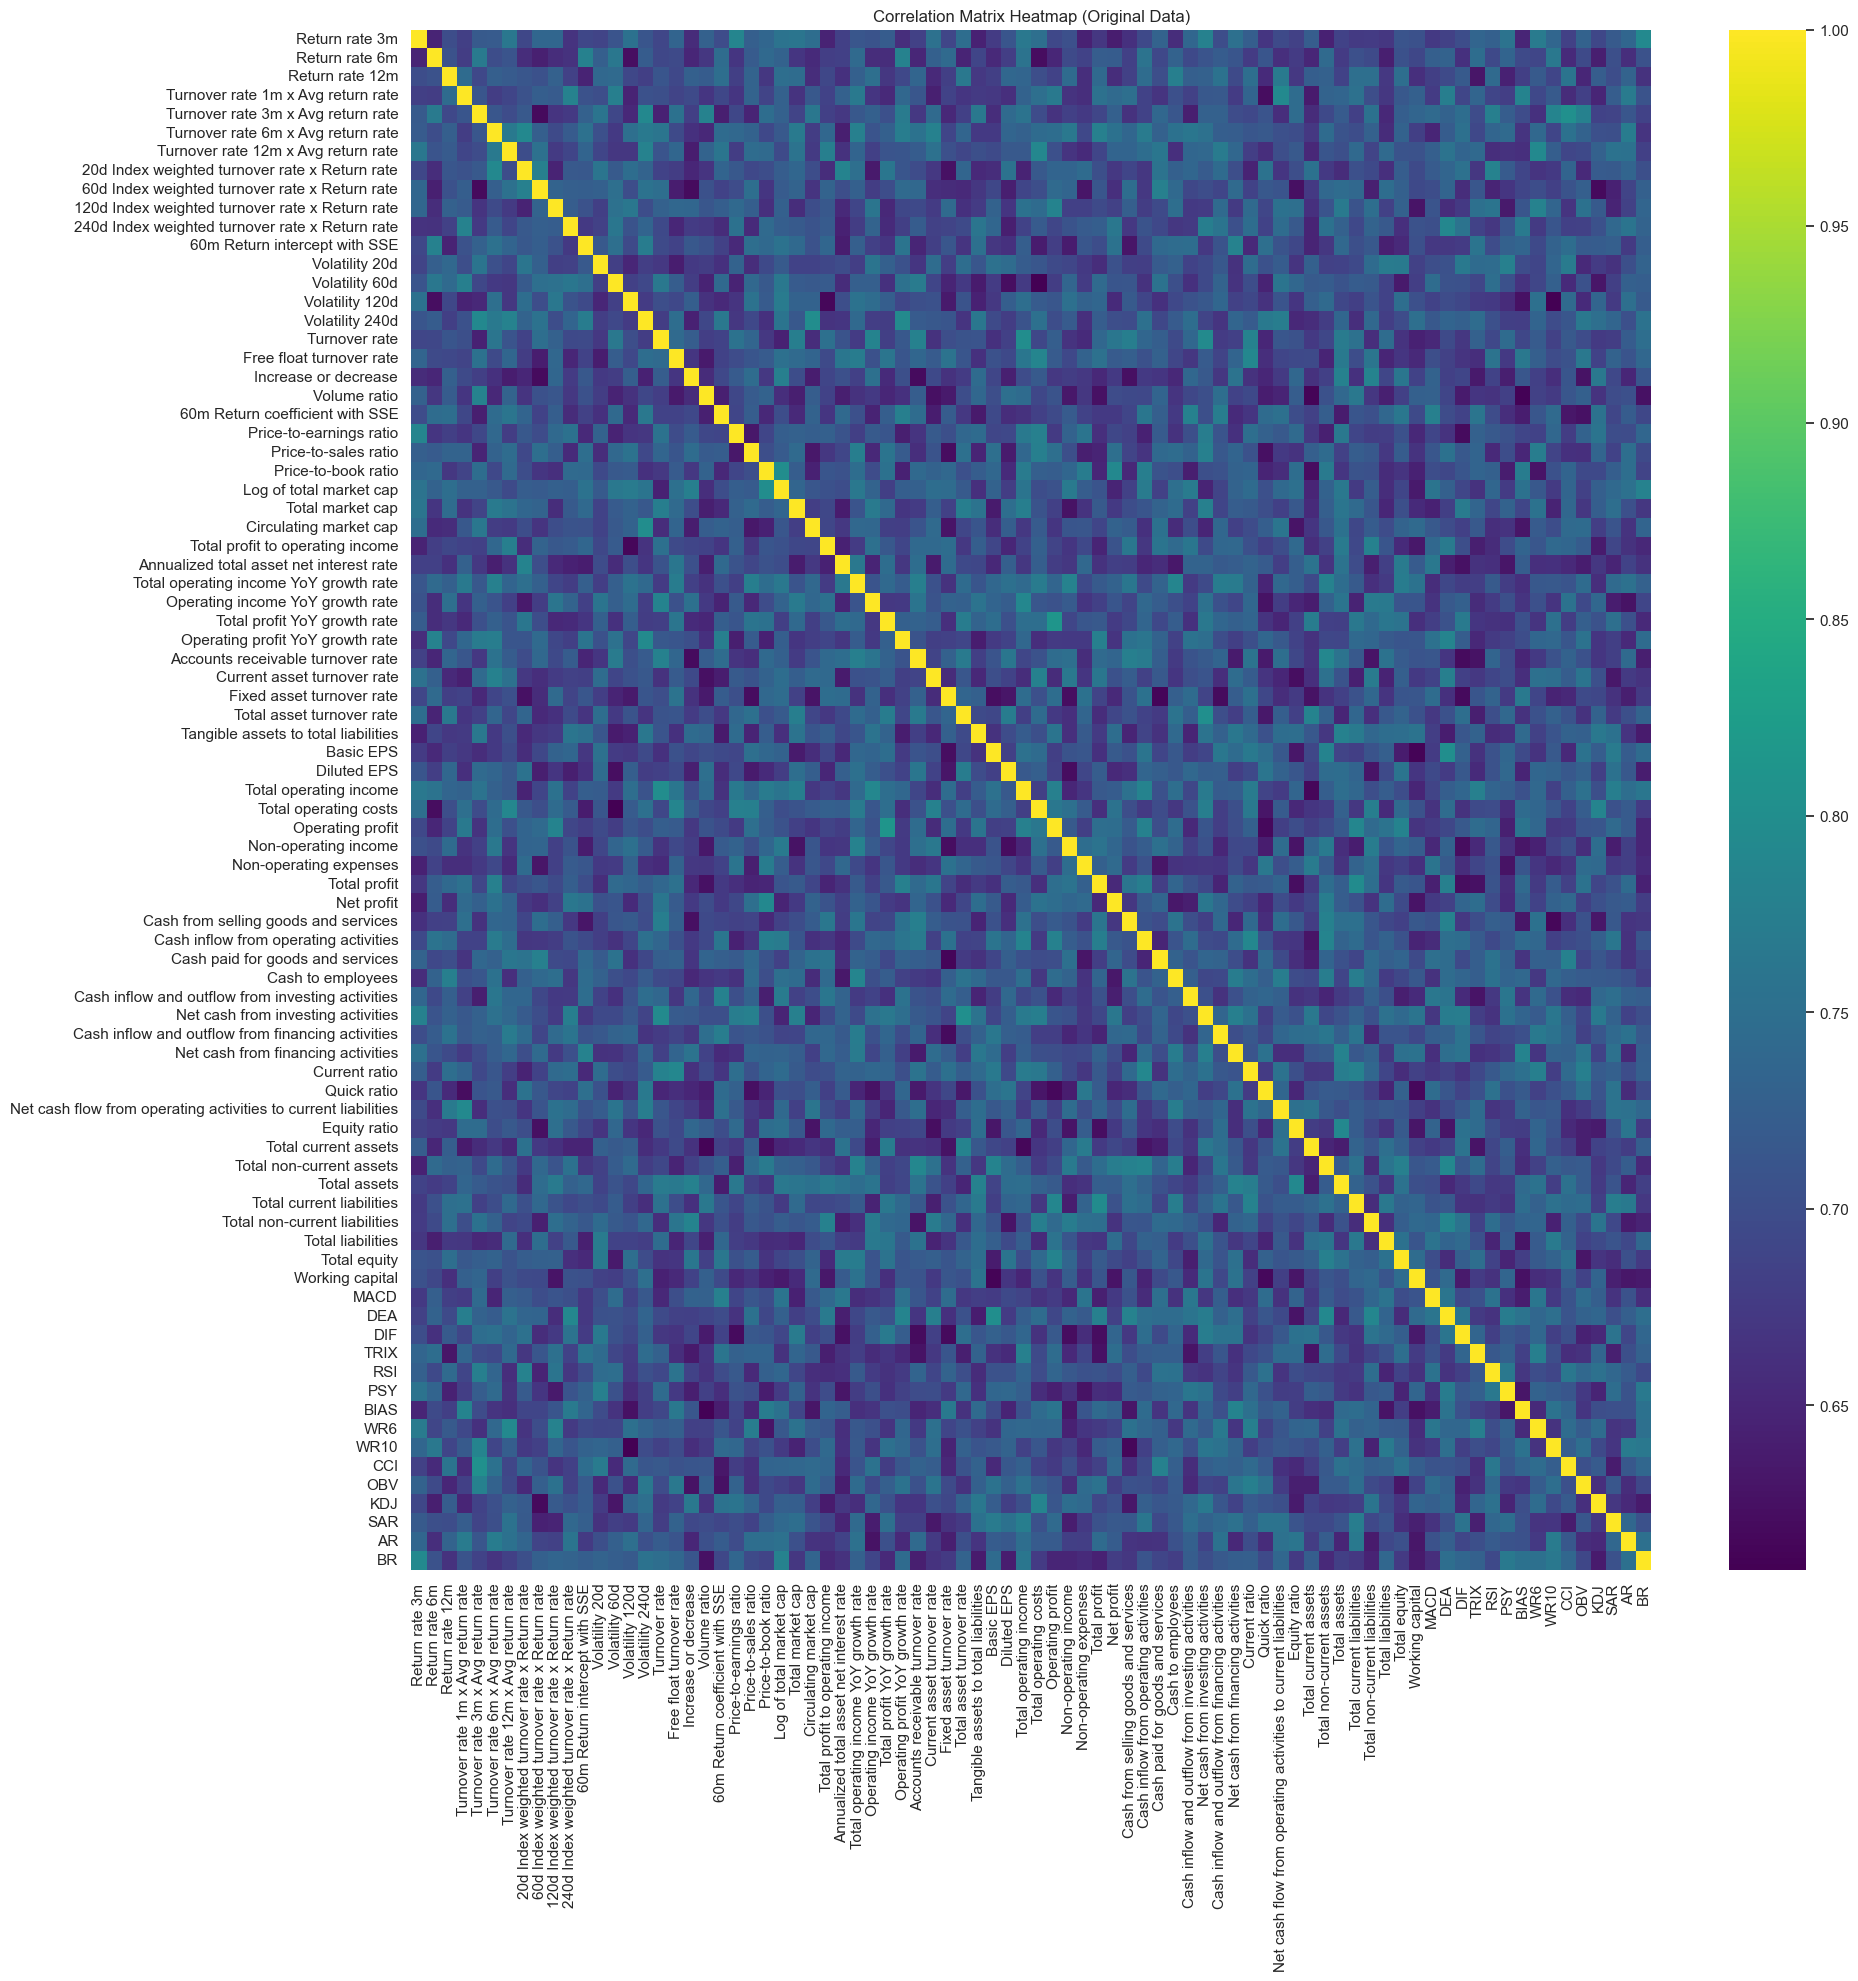

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

original_data_file_path = 'Original_Variable_Data.xlsx'
# 读取原始数据文件
df_original_data = pd.read_excel(original_data_file_path)
# 计算相关系数矩阵
correlation_matrix_original = df_original_data.corr()
# 创建热力图
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_original, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

